# Getting Stock Price Data

In [22]:
import datetime as dt # so that we can set some starting and end dates for the data we can pull 

In [23]:
import matplotlib.pyplot as plt # helps in making plots charts graphs 
from matplotlib import style # to make our graphs looks better

In [24]:
import pandas as pd 
import pandas_datareader.data as web # it is used for remote data access for pandas it returns data in pandas dataframe

In [25]:
style.use('ggplot') # one of many styles we are using ggplot

In [26]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [27]:
df = web.DataReader('TSLA', 'yahoo', start, end) # we are using ticker it is symbol for a company for a stock here TSLA is Tesla
# then where we are getting from we are getting from Yahoo and then for what time then we told about start and end time

In [29]:
df.head(6)
df.tail(6)
# it has adj close means adjusted close it is adjusted for **stock splits** this happens when a company decides their
# price maybe its too high per share they say okay every share is two share actually 

# DataFrame has taken Date as a index

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-22,209.990005,206.500000,208.220001,208.449997,3111100,208.449997
2016-12-23,213.449997,207.710007,208.000000,213.339996,4662900,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005
2016-12-29,219.199997,214.119995,218.559998,214.679993,4035900,214.679993
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002



# Handling Data and Graphing

In [30]:
df.to_csv('tsla.csv') # to convert the dataframe into CSV

In [31]:
# Reading Csv file 
#df = pd.read_csv('C:/Users/PARV/Python_code/Sentdex/tsla.csv')
df = pd.read_csv('tsla.csv')
print(df.head()) 
# Here we have the CSV where index is not Date

         Date   High        Low       Open      Close    Volume  Adj Close
0  2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
1  2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2  2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
3  2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
4  2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


In [32]:
# if we want date time index in CSV we need to do parse_dates = True (to make pandas attempt to infer the format of date time ) 
# and we need to specify the index so index_col = 0 means it will pull first column and read as a index

df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
print(df.head())

# so we have date time index 

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


# Visualization

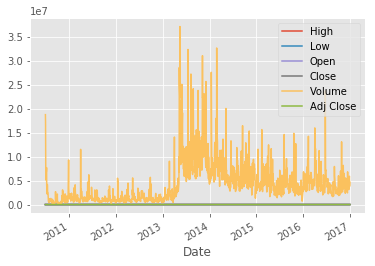

In [33]:
df.plot() # will pull all attributes and plot it 

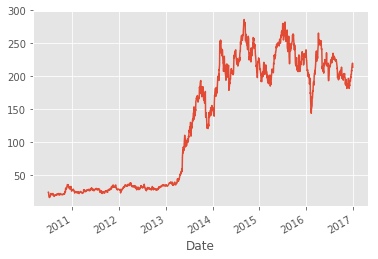

In [34]:
df['Adj Close'].plot() #will only plot Adj Close

In [35]:
print(df[['Open','Close']].head()) # printing only two columns from the data frame

                 Open      Close
Date                            
2010-06-29  19.000000  23.889999
2010-06-30  25.790001  23.830000
2010-07-01  25.000000  21.959999
2010-07-02  23.000000  19.200001
2010-07-06  20.000000  16.110001


# Basic Stock data Manipulation

In [16]:
# to create new columns in pandas
# df['100ma'] = df['Adj Close'].rolling(window=100).mean() 
# this is going to be a 100 moving average  
#100 MA means it takes today's price and take 99 of the prior prices creates an average of those that's todays 100 moving average

In [17]:
df.head()
# we can see NaN because we dont have 99 above values 

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,NaN


In [18]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4662900,213.339996,202.6190
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053
2016-12-29,219.199997,214.119995,218.559998,214.679993,4035900,214.679993,202.2905
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,202.1366


In [19]:
#df.dropna(inplace=True) 
# inplace = True means that we dont need to create new df it will all do it inplace 

In [20]:
df.head() # all rows are removed 

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,20.9879
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,21.0479
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,21.1195
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,21.2339
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,21.3876


In [36]:
# During 100 MA if we dont want NaN in first 100 rows then we can do min_periods=0 so it will not require any number of periods
# to calculate it so on the first day it will be that day price an goes till it calculate that's an average
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

In [37]:
print(df.head())

             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


# Visualization

<BarContainer object of 1640 artists>

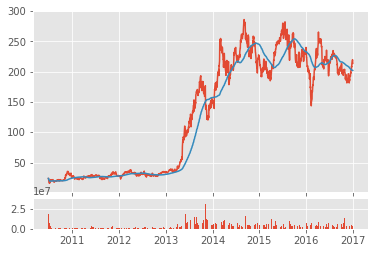

In [47]:
# if we want multiple graphs so we need multiple subplots
ax1 =plt.subplot2grid((6,1),(0,0), rowspan = 5, colspan = 1) # it will take the first parameter in the grid size that means 6 rows and 1 column then we are 
# saying about the starting point starting from zero zero that is top corner then we have told about rowspan (how many rows it 
# is going to span here it is 5 and column span we have defined 1 )
ax2 =plt.subplot2grid((6,1),(5,0), rowspan = 1, colspan = 1, sharex=ax1) # sharex is used because when we zoom one above subplot
#both have common x axis so another one will also zoom similarly

# we have genrated subplots we can graph them
ax1.plot(df.index, df['Adj Close'])  #here we are defining the x and y axis x is our index i.e. Date 
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])